In [1]:
import os
import random
import numpy as np
import PIL
from PIL import Image
from builtins import range


def read_images (path , sz=None):
    c = 0
    X,y = [], []
    for  dirname , dirnames , filenames  in os.walk(path):
        for  subdirname  in  dirnames:
            subject_path = os.path.join(dirname , subdirname)
            for  filename  in os.listdir(subject_path):
                try:
                    im = Image.open(os.path.join(subject_path , filename))
                    #im = im.convert("L")
# resize  to  given  size (if  given)
                    if (sz is not  None):
                        im = im.resize(sz, Image.ANTIALIAS)
                    X.append(np.asarray(im , dtype=np.uint8))
                    y.append(c)
                except  IOError:
                    print "I/O error ({0}): {1}".format(errno , strerror)
                except:
                    print "Unexpected  error:", sys.exc_info ()[0]
                    raise
            c = c+1
    return [X,y]

def asRowMatrix(X):
    """
    Creates a row-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([0, total], dtype=X[0].dtype)
    for row in X:
        mat = np.append(mat, row.reshape(1,-1), axis=0) # same as vstack
    return np.asmatrix(mat)

def asColumnMatrix(X):
    """
    Creates a column-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([total, 0], dtype=X[0].dtype)
    for col in X:
        mat = np.append(mat, col.reshape(-1,1), axis=1) # same as hstack
    return np.asmatrix(mat)


def minmax_normalize(X, low, high, minX=None, maxX=None, dtype=np.float):
    """ min-max normalize a given matrix to given range [low,high].
    
    Args:
        X [rows x columns] input data
        low [numeric] lower bound
        high [numeric] upper bound
    """
    if minX is None:
        minX = np.min(X)
    if maxX is None:
        maxX = np.max(X)
    minX = float(minX)
    maxX = float(maxX)
    # Normalize to [0...1].    
    X = X - minX
    X = X / (maxX - minX)
    # Scale to [low...high].
    X = X * (high-low)
    X = X + low
    return np.asarray(X, dtype=dtype)

def zscore(X):
    X = np.asanyarray(X)
    mean = X.mean()
    std = X.std() 
    X = (X-mean)/std
    return X, mean, std

def shuffle(X,y):
    idx = np.argsort([random.random() for i in range(y.shape[0])])
    return X[:,idx], y[idx]

def shuffle_array(X,y):
    """ Shuffles two arrays!
    """
    idx = np.argsort([random.random() for i in range(len(y))])
    X = [X[i] for i in idx]
    y = [y[i] for i in idx]
    return (X, y)


In [2]:
def  pca(X, y, num_components =0):
    [n,d] = X.shape
    if (num_components  <= 0) or (num_components >n):
        num_components = n
    mu = X.mean(axis =0)
    X = X - mu
    if n>d:
        C = np.dot(X.T,X)
        [eigenvalues ,eigenvectors] = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T)
        [eigenvalues ,eigenvectors] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T,eigenvectors)
        for i in  xrange(n):
            eigenvectors [:,i] = eigenvectors [:,i]/np.linalg.norm(eigenvectors [:,i])

# sort  eigenvectors  descending  by  their  eigenvalue
    idx = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors [:,idx]
# select  only  num_components
    eigenvalues = eigenvalues [0: num_components ].copy()
    eigenvectors = eigenvectors [:,0: num_components ].copy()
    return [eigenvalues , eigenvectors , mu]

In [3]:
def  project(W , X , mu = None ):
    if mu is None :
        return np . dot (X , W )
    return np . dot ( X - mu , W )
def  reconstruct(W, Y, mu=None):
    if mu is None:
        return  np.dot(Y,W.T)
    return  np.dot(Y, W.T) + mu

In [4]:
import numpy as np
import matplotlib . pyplot as plt
import matplotlib . cm as cm

def create_font(fontname ='Tahoma ', fontsize =10) :
    return { 'fontname': fontname , 'fontsize': fontsize }

def subplot ( title , images , rows , cols , sptitle = " subplot " , sptitles =[] , colormap = cm.gray , ticks_visible = True , filename = None ) :
    fig = plt . figure ()
# main title
    fig . text (.5 , .95 , title , horizontalalignment='center')
    for i in xrange ( len ( images ) ) :
        ax0 = fig . add_subplot ( rows , cols ,( i +1) )
        plt . setp(ax0.get_xticklabels() , visible = False )
        plt . setp(ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ) :
            plt . title ( " % s #% s " % ( sptitle , str ( sptitles [ i ]) ) , create_font ( 'Tahoma' ,10) )
        else :
            plt . title ( " % s #% d " % ( sptitle , ( i +1) ) , create_font ( 'Tahoma' ,10) )
        plt . imshow ( np . asarray ( images [ i ]) , cmap = colormap )
    if filename is None :
        plt . show ()
    else :
        fig . savefig ( filename )

In [5]:
import sys
# append tinyfacerec to module search path
# import numpy and matplotlib colormaps
import numpy as np
# import tinyfacerec modules
#from tinyfacerec . subspace import pca
#from tinyfacerec . util import normalize , asRowMatrix , read_images
#from tinyfacerec . visual import subplot
# read images
[X , y ] = read_images("/home/pramod/facerec_data/AT&T")
print X[0].shape

# perform a full pca
[D , W , mu ] = pca( asRowMatrix( X ) , y )
print W.shape

(112, 92)
(10304, 395)


/home/pramod/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Tahoma'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


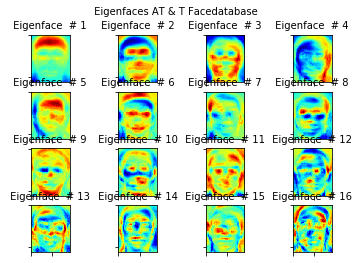

In [6]:
import matplotlib . cm as cm
# turn the first ( at most ) 16 eigenvectors into grayscale
# images ( note : eigenvectors are stored by column !)
a=[i for i in xrange(min(len(X),16))]
E = []
for i in xrange ( min ( len ( X ) , 16) ) :
    e = W [: , i ]. reshape ( X [0]. shape )
    E . append (minmax_normalize (e ,0 ,255) )
# plot them and store the plot to " p y t h o n _ e i g e n f a c e s . pdf "
subplot (title = " Eigenfaces AT & T Facedatabase " , images=E, rows =4 , cols =4 , sptitle = "Eigenface " , colormap = cm . jet , filename = None )

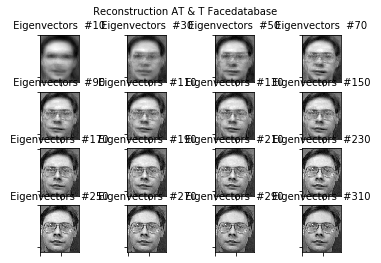

In [7]:
import matplotlib . cm as cm

# recons truction steps
steps=[i for i in xrange( 10, min ( len ( X ) , 320) , 20) ]
E = []
for i in xrange ( min ( len ( steps ) , 16) ) :
    numEvs = steps [ i ]
    P = project( W [: ,0: numEvs ] , X [0]. reshape (1 , -1) , mu )
    R = reconstruct( W [: ,0: numEvs ] , P , mu )
# reshape and append to plots
    R = R . reshape ( X [0]. shape )
    E . append (minmax_normalize(R ,0 ,255) )
# plot them and store the plot to " p y t h o n _ r e c o n s t r u c t i o n . pdf "
subplot (title = " Reconstruction AT & T Facedatabase " , images=E, rows =4 , cols =4 , sptitle = "Eigenvectors ",sptitles =steps , colormap = cm . gray , filename = None)    


In [4]:
import  numpy  as np
from sklearn.model_selection import train_test_split


class  AbstractDistance(object):
    def  __init__(self , name):
        self._name = name
    def  __call__(self ,p,q):
        raise  NotImplementedError("Every  AbstractDistance  must  implement  the  __call__method.")
    @property
    def  name(self):
        return  self._name
    def  __repr__(self):
        return  self._name
class  EuclideanDistance(AbstractDistance):
    def  __init__(self):
        AbstractDistance.__init__(self ,"EuclideanDistance")
    def  __call__(self , p, q):
        p = np.asarray(p).flatten ()
        q = np.asarray(q).flatten ()
        return  np.sqrt(np.sum(np.power ((p-q) ,2)))
class  CosineDistance(AbstractDistance):
    def  __init__(self):
        AbstractDistance.__init__(self ,"CosineDistance")
    def  __call__(self , p, q):
        p = np.asarray(p).flatten ()
        q = np.asarray(q).flatten ()
        return  -np.dot(p.T,q) / (np.sqrt(np.dot(p,p.T)*np.dot(q,q.T)))

In [13]:
import  numpy  as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.optimizers import RMSprop,SGD

import keras
from keras import backend as K
K.set_image_dim_ordering('th')




class  BaseModel(object):
    def  __init__(self , X=None , y=None , dist_metric=EuclideanDistance (), num_components=0):
        self.dist_metric = dist_metric
        self.num_components = 0
        self.projections = []
        self.W = []
        self.mu = []
        if (X is not  None) and (y is not  None):
            self.compute(X,y)
    def  compute(self , X, y):
        raise  NotImplementedError("Every  BaseModel  must  implement  the  compute  method.")
    def  predict(self,X):
            #minDist = np.finfo('float').max
            #minClass =  -1
            
            
            
            self.Q=[]
            for xi in X:
                self.Q.append(project(self.W, xi.reshape (1,-1), self.mu))
            #print self.projections[1].shape
            #print self.Q[0].shape
            
            
            #print self.projections[0].shape
            AX=np.array(self.projections)
            
            inp=np.array(self.Q)
            inp=inp.reshape((inp.shape[0], -1), order='F')
            AX=AX.reshape((AX.shape[0], -1), order='F')
            AX = AX.astype('float32')
            inp = inp.astype('float32')
            AX=AX / 255 #find out how this works and how to get each value in AX between 0 and 1
            inp /= 255
            num_classes=40
            print len(AX)
            print len(inp)
            y_tr = np_utils.to_categorical(y_train, num_classes)
            y_te = np_utils.to_categorical(y_test, num_classes)
            model = Sequential()
            model.add(Dense(128, input_dim=len(AX[1]), init="uniform",activation="relu"))
            model.add(Dense(40))
            model.add(Activation("softmax"))
            sgd = SGD(lr=0.01)
            model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])
            model.fit(AX, y_tr, nb_epoch=500, batch_size=5)
            (loss, accuracy) = model.evaluate(inp,y_te, verbose=1)
            print "[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100)
            
            
            

In [14]:
class EigenfacesModel( BaseModel ) :
    def  __init__(self , X=None , y=None , dist_metric=EuclideanDistance (), num_components=0):
        super(EigenfacesModel , self).__init__(X=X,y=y,dist_metric=dist_metric ,num_components=num_components)
    def  compute(self , X, y):
        [D, self.W, self.mu] = pca(asRowMatrix(X),y, self.num_components)
# store  labels
        self.y = y
# store  projections
        for xi in X:
            self.projections.append(project(self.W, xi.reshape (1,-1), self.mu))

In [15]:
import sys
import matplotlib . cm as cm
from sklearn.model_selection import train_test_split

# append tinyfacerec to module search path
# import numpy and matplotlib colormaps
import numpy as np
# import tinyfacerec modules
# read images
[X , y ] =(read_images( "/home/pramod/facerec_data/AT&T" ))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
print len(y_test)
amodel = EigenfacesModel( X_train, y_train)




# get a prediction for the first observation
#print " expected = " , y_test , " / " , " predicted = " , model . predict(X_test)









198


In [16]:
amodel . predict(X_test)


197
198
Epoch 1/500
197/197 [==============================] - 0s - loss: 3.4805 - acc: 0.1168         
Epoch 2/500
197/197 [==============================] - 0s - loss: 2.1687 - acc: 0.8376     
Epoch 3/500
197/197 [==============================] - 0s - loss: 1.2311 - acc: 1.0000     
Epoch 4/500
197/197 [==============================] - 0s - loss: 0.6215 - acc: 1.0000     